In [ ]:
# Loading the libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from keras.utils import to_categorical
import keras

from warnings import filterwarnings
filterwarnings('ignore')


## KNN Implementation

In [ ]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#select 10000 for training and 1000 for test
test_number = 10000
train_number = 50000
X_train = X_train[0:train_number]
y_train = y_train[0:train_number]
X_test = X_test[0:test_number]
y_test = y_test[0:test_number]

In [ ]:
# print the shape of the train and test data
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1000, 32, 32, 3)
y_train shape: (1000, 1)
X_test shape: (100, 32, 32, 3)
y_test shape: (100, 1)


In [ ]:
# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier()

In [ ]:
# Define the parameter grid for k
param_grid = {'n_neighbors': [1, 4, 7, 10, 13, 16, 17]}

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 4, 7, 10, 13, 16, 17]},
             return_train_score=True)

In [ ]:
# Print the best value of k
print("Best value of k:", grid_search.best_params_)

# Print the best score
print("Best score:", grid_search.best_score_)

Best value of k: {'n_neighbors': 7}
Best score: 0.29319999999999996


In [ ]:
# Make predictions on the test data using the best value of k
knn = grid_search.best_estimator_
y_pred = knn.predict(X_test)

In [ ]:
# Print the accuracy of the classifier
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)
print(str(int(accuracy_knn * 1000)) + " out of " + str(test_number) + " we got correctly")

Accuracy: 0.285
285 out of 1000 we got correctly


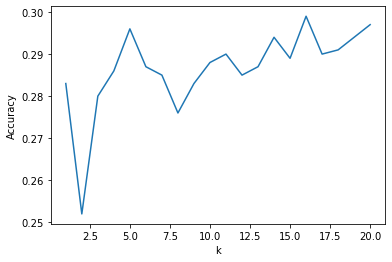

In [ ]:
#Let's now plot the accuracy as a function of k


accuracies = []
# First Loop over different values of k
for k in range(1, 21):
    # Create a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    # Compute the accuracy on the test set
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    # Append the accuracy to the list of accuracies
    accuracies.append(accuracy)

# Plot the accuracy as a function of k
sns.lineplot(range(1, 21), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

We can also plot the confusion matrix to see which classes are being misclassified by the model.
Here is an example of how you might use the confusion_matrix function from sklearn to create a confusion matrix:

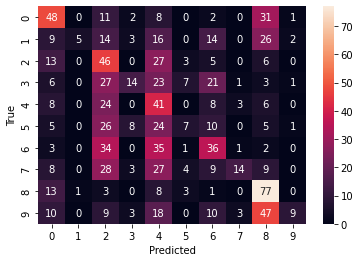

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Print the classification report of KNN
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.47      0.42       103
           1       0.83      0.06      0.11        89
           2       0.21      0.46      0.29       100
           3       0.42      0.14      0.21       103
           4       0.18      0.46      0.26        90
           5       0.28      0.08      0.13        86
           6       0.31      0.32      0.32       112
           7       0.64      0.14      0.23       102
           8       0.36      0.73      0.48       106
           9       0.64      0.08      0.15       109

    accuracy                           0.30      1000
   macro avg       0.43      0.29      0.26      1000
weighted avg       0.43      0.30      0.26      1000



## Linear Regression

In [ ]:
# Create and fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  12.18284689178423


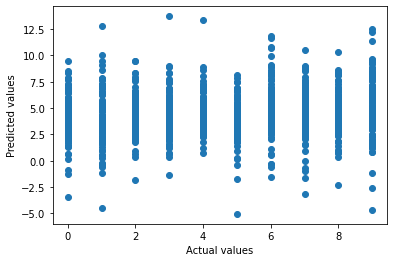

In [ ]:
#Plotting the predicted values vs real values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [ ]:
# Calculating the R2 value
r_squared = model.score(X_test, y_test)
print("R-squared: ", r_squared)

R-squared:  -0.43981608836942176


## SVM applied 

In [ ]:
# Dimensionality reduction using PCA
pca = PCA(n_components=150)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Splitting the data into smaller subset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# create a parameter grid for the Linear SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

In [ ]:
# create and fit the model
clf = svm.LinearSVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format(grid_search.best_score_*100))

Best parameters:  {'C': 100}
Best score: 17.93%


In [ ]:
# Predict on validation set
y_pred = grid_search.predict(X_val)

# calculate accuracy
acc = accuracy_score(y_val, y_pred)
print("Validation accuracy: {:.2f}%".format(acc*100))

# Predict on test set
y_pred_test = grid_search.predict(X_test)

# calculate accuracy
acc_test = accuracy_score(y_test, y_pred_test)
print("Test accuracy: {:.2f}%".format(acc_test*100))

Validation accuracy: 16.75%
Test accuracy: 18.40%


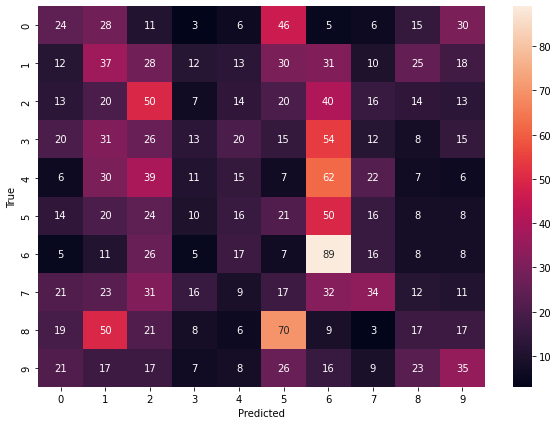

              precision    recall  f1-score   support

           0       0.15      0.14      0.15       174
           1       0.14      0.17      0.15       216
           2       0.18      0.24      0.21       207
           3       0.14      0.06      0.08       214
           4       0.12      0.07      0.09       205
           5       0.08      0.11      0.09       187
           6       0.23      0.46      0.31       192
           7       0.24      0.17      0.19       206
           8       0.12      0.08      0.10       220
           9       0.22      0.20      0.21       179

    accuracy                           0.17      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.16      0.17      0.16      2000



In [ ]:
# confusion matrix
cm = confusion_matrix(y_val, y_pred)
# heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# classification report
print(classification_report(y_val, y_pred))

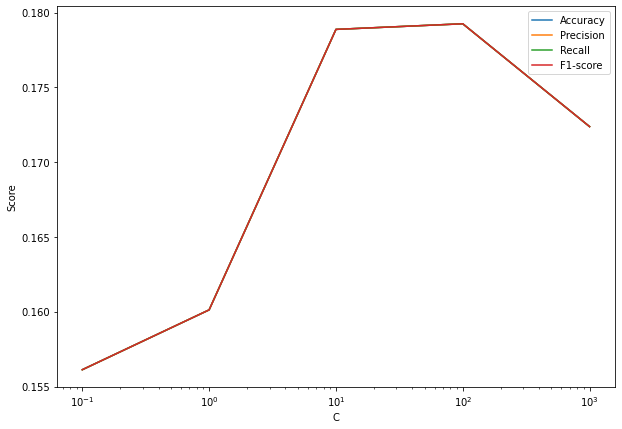

In [ ]:
# Calculate accuracy, precision, recall, f1-score
accuracies = grid_search.cv_results_['mean_test_score']
precisions = grid_search.cv_results_['mean_test_score']
recalls = grid_search.cv_results_['mean_test_score']
f1_scores = grid_search.cv_results_['mean_test_score']

# plot the scores versus the different values of C
plt.figure(figsize=(10,7))
plt.plot(param_grid['C'], accuracies, label='Accuracy')
plt.plot(param_grid['C'], precisions, label='Precision')
plt.plot(param_grid['C'], recalls, label='Recall')
plt.plot(param_grid['C'], f1_scores, label='F1-score')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend()
plt.show()

## MLP applied

In [ ]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
# Convert the labels to categorical format
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
# Define the model
def create_model(optimizer='adam', init='uniform'):
    model = Sequential()
    model.add(Dense(512, input_shape=(32*32*3,), activation='relu', kernel_initializer=init))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_initializer=init))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax', kernel_initializer=init))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
# Define the grid search parameters
batch_size = [10, 50]
epochs = [10, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# Print the best parameters and the corresponding score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.334000 using {'batch_size': 10, 'epochs': 50}


Text(0.5, 1.0, 'Loss Curves')

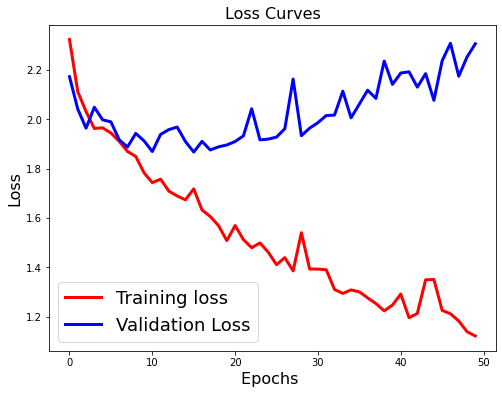

In [ ]:
# train the model (as before)
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

# plot the training loss and accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

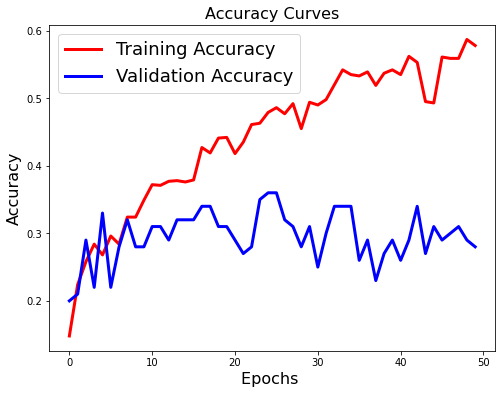

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

In [ ]:
accuracy_ann = history.history['accuracy'][49] #Best accuracy at epoch 50
print("Accuracy: ", accuracy_ann)

Accuracy:  0.578000009059906


## CNN implementation

In [ ]:
# Normalizing
X_train = X_train/255
X_test = X_test/255
# One-Hot-Encoding
y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [ ]:
# create our model
model = Sequential()
model.add(Conv2D(32,(4,4), input_shape = (32,32,3), activation= "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation= "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ="relu"))
model.add(Dense(10, activation ="softmax"))
model.compile(loss ="categorical_crossentropy", optimizer ="adam", metrics =["accuracy"])

In [ ]:
model.summary()
history = model.fit(X_train, y_train, epochs = 20, verbose=1, validation_data= (X_test, y_test))

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 800)               0         
                                                                 
 dense_129 (Dense)           (None, 128)             

Text(0.5, 1.0, 'Loss Curves')

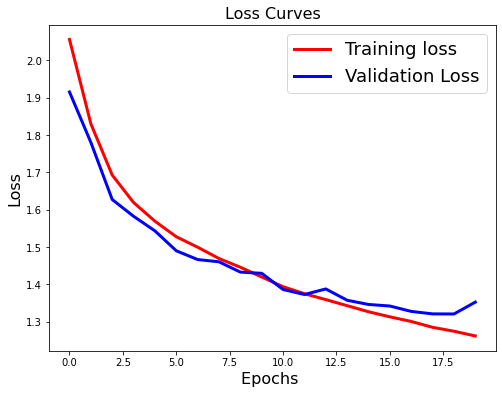

In [ ]:
# plot the training loss and accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

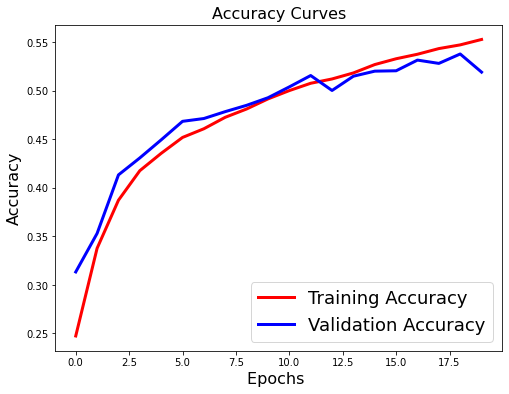

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

In [ ]:
accuracy_cnn = history.history['accuracy'][19]

print("Accuracy of CNN model is ", accuracy_cnn)

Accuracy of CNN model is  0.5529599785804749
